# Week 4 Exercise- Stewart Wilson

## Introduction

In this assignment I am tasked with developing a K-Means clustering model with an ALS dataset. The data contains a plethora of different information on anonymized patients diagnosed with ALS. As I build my model and begin to look for connections, I wonder how we can best create models when faced with so many features? In addition how do we interpret clusters once they appear? Especially when the dataset contains information with which I have little domain knowledge, how do I draw meaningful conclusions from my results?

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

### Importing Data

In [3]:
als_df = pd.read_csv("als_data.csv")

In [4]:
als_df

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [5]:
# drop unnecessary columns
als_df.drop(["ID", "SubjectID"], axis = 1, inplace=True)

### Looking for Optimal Number of Clusters

In [6]:
scaler = StandardScaler()

In [7]:
scaled = scaler.fit_transform(als_df)

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]

C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.07859759170621362


C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.06738837876179625


C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.061738601307088754


C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.05444558396227597


C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.04209724877685367


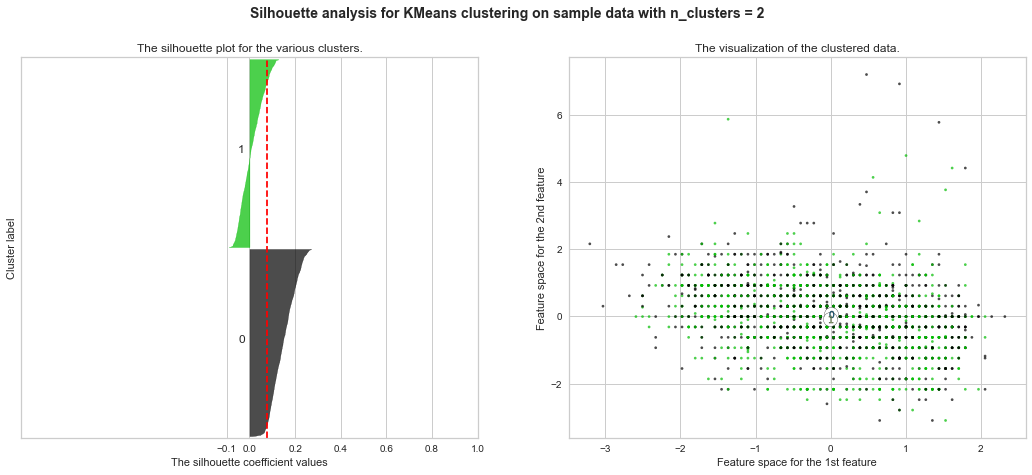

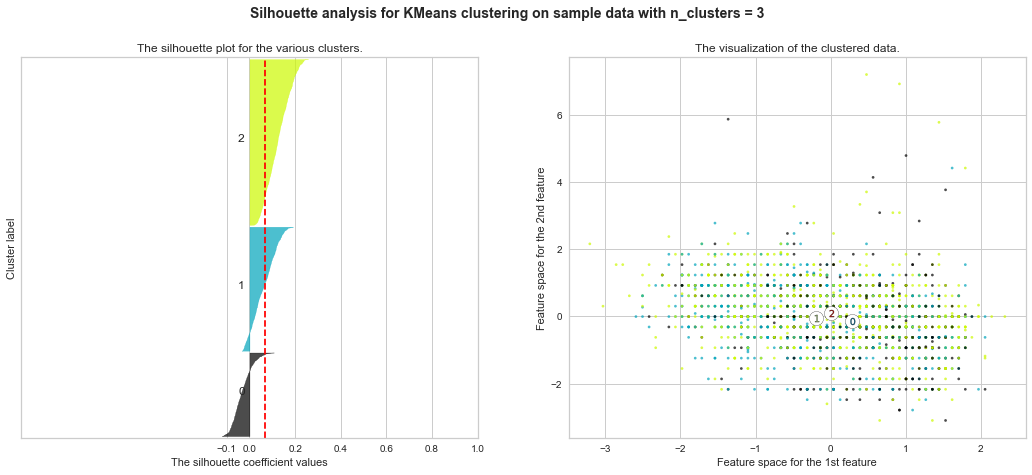

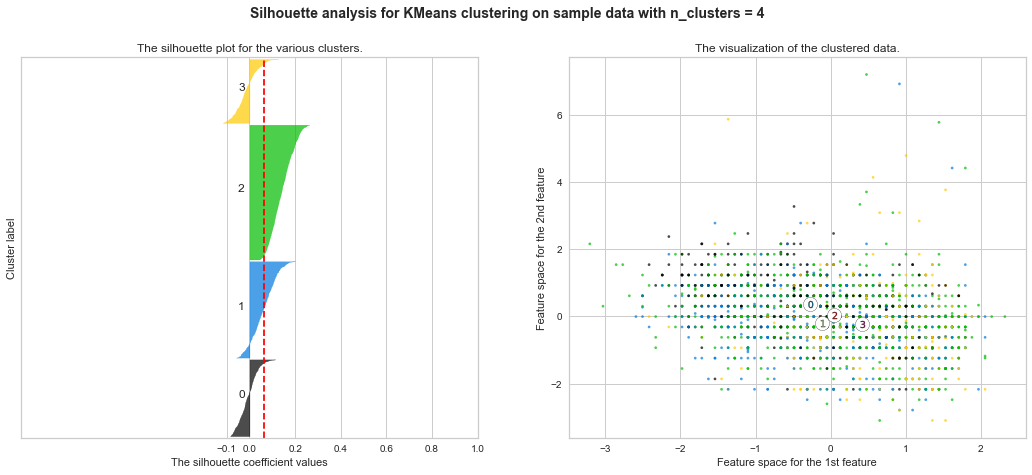

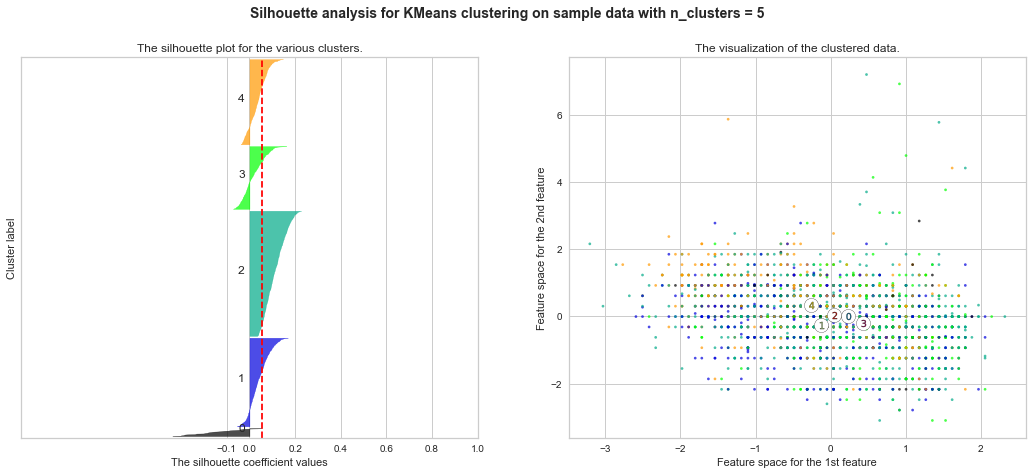

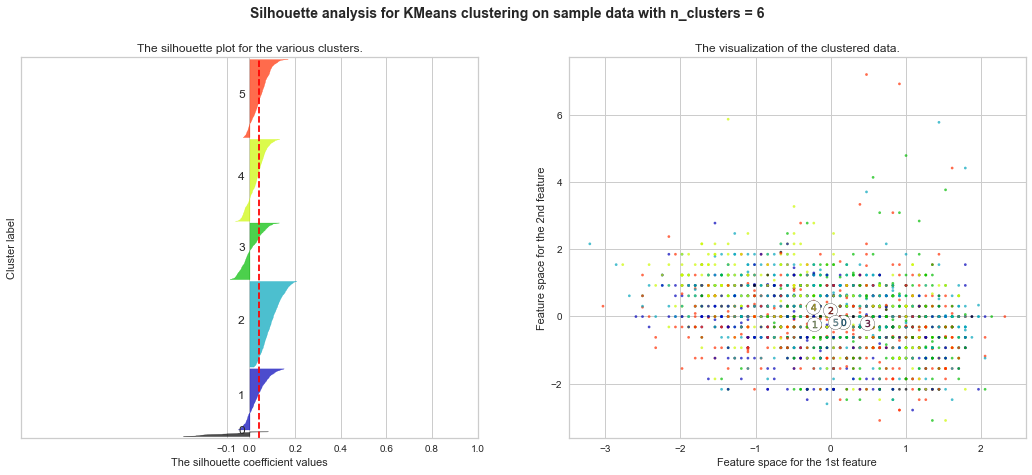

In [55]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(scaled) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters = n_clusters, n_init = "auto", random_state = 10)
    cluster_labels = clusterer.fit_predict(scaled)    
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}") 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled[:, 0], scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()
    

### Optimal Number of Clusters

I have decided to go with 2 clusters. It had the highest average silhouette score of .08 and while that is not overall an impressive score, I believe it to be because of the number of features under consideration. The silhouette scores were clearly highest in the second or third cluster regardless of total number of clusters. The highest peak in most plots were either the second or third cluster. Given that 2 clusters has a higher average score, though I have decided to stick with two clusters rather than three. 

### Fitting K-Means Model to Data

In [12]:
# initializing cluster
cluster = KMeans(n_clusters = 2, random_state = 10)

In [13]:
# train model 
model = cluster.fit(scaled)

C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Stewart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


### Fit PCA Model

In [17]:
# PCA w/ two features
pca = PCA(n_components = 2)

In [22]:
# fit to scaled data
features_pca = pca.fit_transform(scaled)

In [54]:
# View labels
model.labels_

array([1, 1, 0, ..., 1, 1, 0])

### Scatterplot of PCA Data

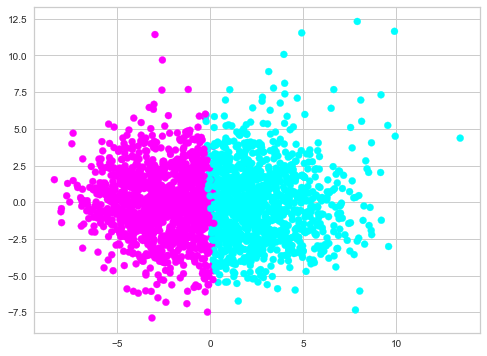

In [53]:
# plots each features 
plt.figure(figsize =(8,6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c = model.labels_.astype(float), cmap="cool")
plt.show()

The above visualization is a scatterplot of our PCA transformed data. There are two features (one for each axis). The data points are colored according to which cluster they belong to, as calculated in previous steps. 

## Conclusions

Let us summarize what we have accomplished. We first removed features irrelevant to the patient's ALS condition (chiefly, the ID columns). Then we applied a standard scalar to the data. This helps make the features readily comparable as they are transformed to the same scale. 

Then, we created a plot of silhouette scores vs the number of clusters in a K-means cluster. We went from 2 clusters to 6 and looked at the silhouette score for each. The silhouette score gives us an idea of how good a given number of clusters fits the data. Across the board the silhouette scores were meager, all under .1 (of a maximum range of 1!). We chose 2 clusters as our optimal amount since it had the highest score.

We created a K-Means model with 2 clusters and fit it to the scaled data.

Because of the large number of features in our data set, it is impossible to visualize the results of this clustering (that would be a graph in 40 dimensions). As such, we used Principal Component Analysis to reduce the number of features to better visualize the results of our cluster. We fit a PCA model to two features from our scaled data and then created a scatterplot of this data colored by which cluster it is in. The result is seen directly above.

What to take from this analysis? Firstly, the abysmal silhouette scores mean we should question the goodness of K-Means as an appropriate model for the data provided. In the visualization, the clusters partially overlap, there is little distinction between the two. This is not what we want from a clustering model; we want the clusters to be separate and well-defined. Further analysis should investigate other clustering model to see if there is a better approach. That said, we do still have 2 relatively well-identified clusters. The next step should be analyzing them further to investigate what those clusters may represent when it comes to ALS patients. We could do further visualization with selected features to see what it may mean for ALS patients to have these different clusters.